In [6]:
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [25]:
%load_ext autoreload
%autoreload 2
from utils import *
from MLP_WGAN import MLP_WGAN
from DCGAN import DC_WGAN

## Load data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True, reshape=[])
train_set = mnist.train.images

print(train_set.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 28, 28, 1)


## Training

### Defining Parameters

In [9]:
mb_size = 64
z_dim = 100
n_fig= 16
n_disc = 5
train_epoch = 1000000
penalty = 10
x_dim = train_set.shape[1]
color = train_set.shape[3]

### DCGAN architecture
Training and saving the model

In [12]:
out_dir = 'out_DCGAN_actual'
mnist_train_dcgan = DC_WGAN(train_set, mb_size, train_epoch, x_dim, z_dim, n_fig, out_dir, color, penalty, n_disc)
history_dcgan=mnist_train_dcgan.training()

(?, 28, 28, 1)


KeyboardInterrupt: 

### Plotting Output
Plotting last 10 images

In [8]:
fileNames=[]
for root, dirs, files in os.walk(out_dir):
    for filename in files:
            print(root+'/'+filename)
            fileNames.append(root+'/'+filename)

out_DCGAN_actual/000.png
out_DCGAN_actual/001.png


In [ ]:
for i in range(1, -1, -1):
    print(fileNames[i])
    img=mpimg.imread(fileNames[i])
    plt.imshow(img)
    plt.show()
    plt.close()

### Restoring Saved Models

In [2]:
out_dir='out_improvedGAN_baseline'
generateSamples(out_dir)

out_improvedGAN_baseline/model/model_0
INFO:tensorflow:Restoring parameters from out_improvedGAN_baseline/model/model_0


KeyError: "The name 'z' refers to an Operation not in the graph."

## MLP

In [26]:
out_dir = 'out_MLP'
mnist_train_mlp = MLP_WGAN(train_set, mb_size, train_epoch, x_dim, z_dim, n_fig, out_dir, color, penalty, n_disc)
history_mlp=mnist_train_mlp.training()

(?, 28, 28, 1)
Iter: 0; D loss: 0.9681; G_loss: -0.6284


KeyboardInterrupt: 

### Plotting

In [27]:
fileNames=[]
for root, dirs, files in os.walk(out_dir):
    for filename in files:
        if os.path.splitext(filename)[1].lower() =='.png':
                print(root+'/'+filename)
                fileNames.append(root+'/'+filename)

out_MLP/000.png


out_MLP/000.png


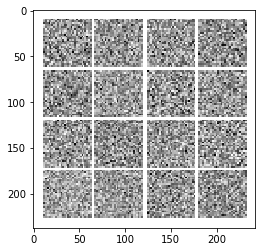

In [28]:
for i in range(0, -1, -1):
    print(fileNames[i])
    img=mpimg.imread(fileNames[i])
    plt.imshow(img)
    plt.show()
    plt.close()

### Restoring Previous models

out_MLP/model/model_1
INFO:tensorflow:Restoring parameters from out_MLP/model/model_1


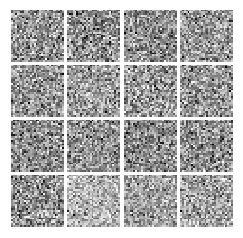

In [38]:
out_dir='out_MLP'
generateSamples(out_dir)